In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("F:\Phyton\Jadi - Machine Learning\Jadi - Machine Learning\machine_learning_with_python_jadi-main\FuelConsumption.csv")
# take a look at the dataset

df["ENGINESIZE"].head(2)

0    2.0
1    2.4
Name: ENGINESIZE, dtype: float64

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


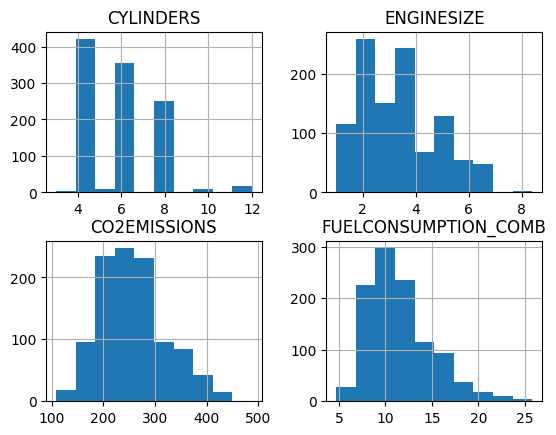

In [7]:
viz = cdf[['CYLINDERS', "ENGINESIZE", 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

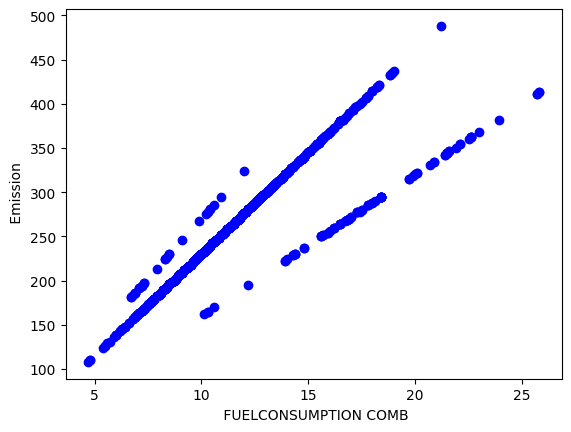

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel(" FUELCONSUMPTION COMB")
plt.ylabel(" Emission")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

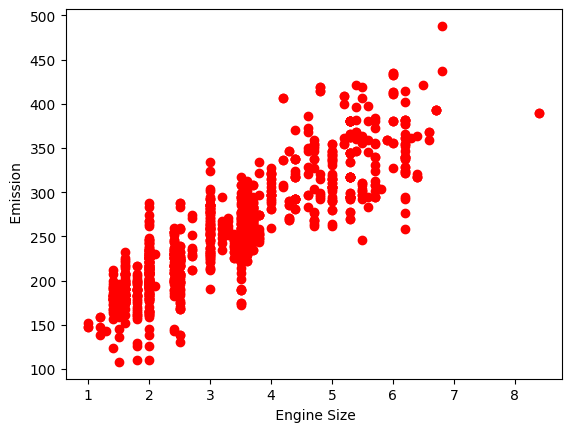

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel(" Engine Size")
plt.ylabel(" Emission")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

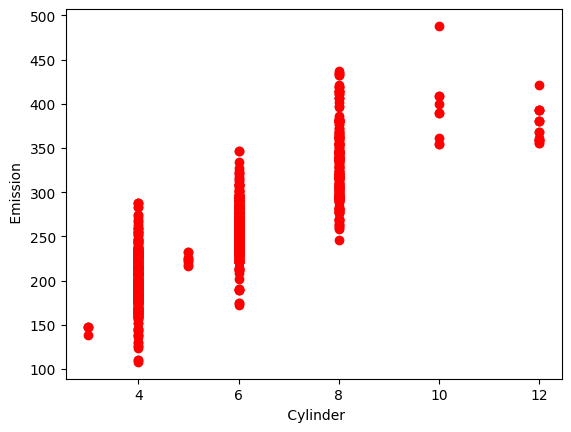

In [10]:
# Plot CYLINDER vs the Emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel(" Cylinder")
plt.ylabel(" Emission")
plt.show

In [11]:
# Train and Test dataset
# split our dataset into train (80%) and test(20%) sets.
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [12]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
7,3.7,6,11.1,255
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


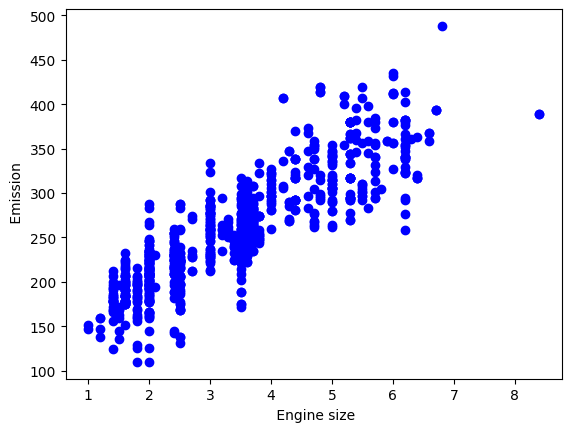

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel(" Engine size")
plt.ylabel(" Emission")
plt.show()

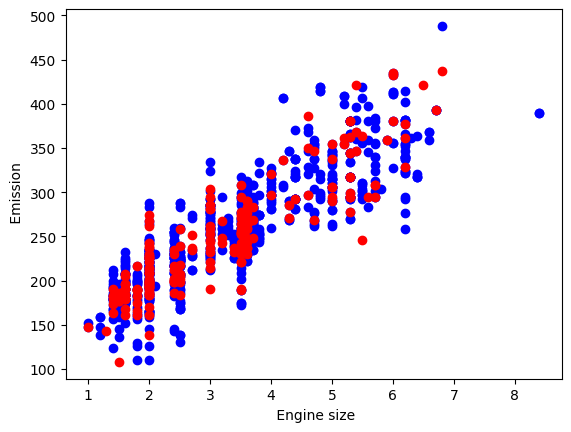

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel(" Engine size")
plt.ylabel(" Emission")
plt.show()

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
# the Coefficients
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

Coefficients: [[38.73270471]]
Intercept: [126.99978908]


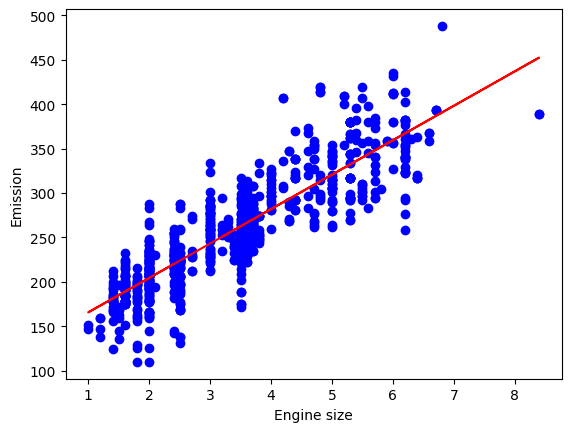

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [24]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print(regr.predict([[2.0]]))

print(f'\nMean absolute error: {np.mean(np.absolute(test_y - test_y_))}')
print(f'Residual sum of squares (MSE): {np.mean((test_y - test_y_)**2)}')
print(f'R2-score: {r2_score(test_y, test_y_)}')

[[204.46519849]]

Mean absolute error: 22.32982589227622
Residual sum of squares (MSE): 845.4947151907504
R2-score: 0.7901151348600698
